# Class Single Recording Code

Developing Code for Single Recordings
- Filtering
- Whole Trace Observations
- Epoch Extraction
- PSTHS

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from P2_Code.tdt_class import *
from P2_Code.Single_Recording_Functions import *

In [2]:
experiment_path = r"C:\Users\yongc\Desktop\Photometry\Pilot_2\Synapse\Tanks\5_10_24_Social_Defeat_P2-240510-080738"
single_recording_path = r"C:\Users\yongc\Desktop\Photometry\Pilot_2\Synapse\Tanks\5_10_24_Social_Defeat_P2-240510-080738\n1-240510-085449"

## Bout Data from CSV

In [3]:
tdt_data = tdt.read_block(single_recording_path)
bout_aggregated_csv_path = r"P2_Code\5_10_24_Social_Defeat_Annotations\n1-240510-085449.csv"

# Assuming `tdt_data` is already loaded
tdt_data_obj = TDTData(tdt_data)

tdt_data_obj.extract_manual_annotation_behaviors(bout_aggregated_csv_path)

# Remove specified time range
tdt_data_obj.remove_time(start_time=780, end_time=921)

Found Synapse note file: C:\Users\yongc\Desktop\Photometry\Pilot_2\Synapse\Tanks\5_10_24_Social_Defeat_P2-240510-080738\n1-240510-085449\Notes.txt
read from t=0s to t=920.46s


## Plot Raw Trace

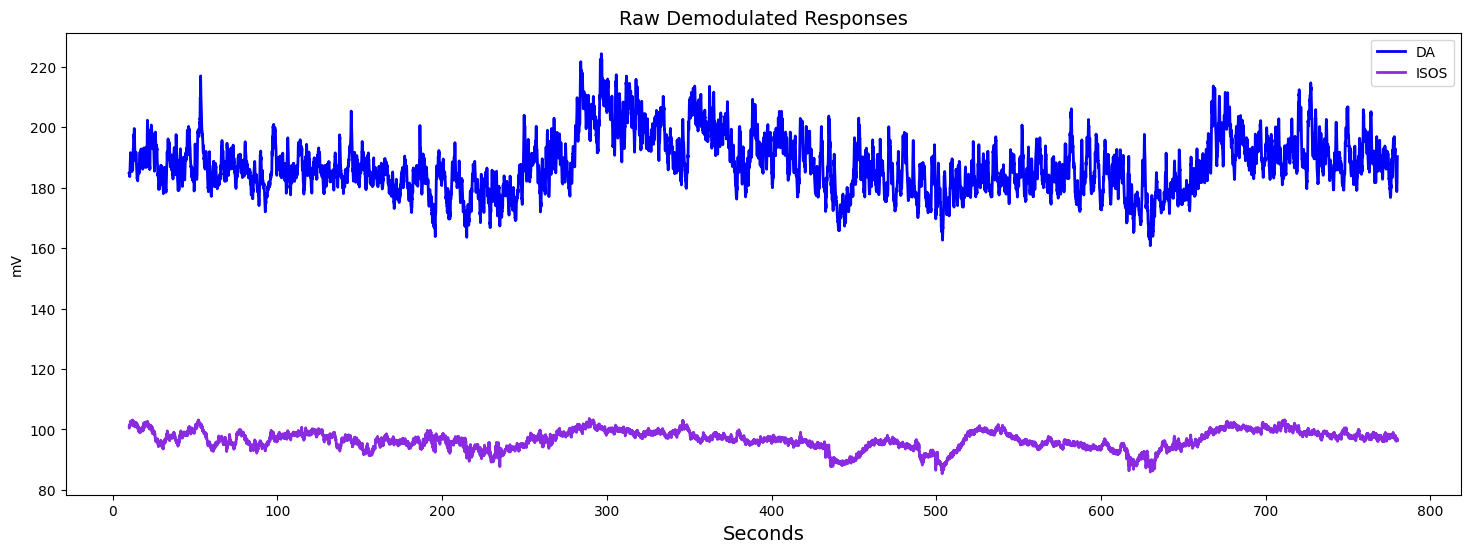

In [4]:
# Remove initial LED artifact
tdt_data_obj.remove_initial_LED_artifact(t=10)

# Plot raw trace
tdt_data_obj.plot_raw_trace()

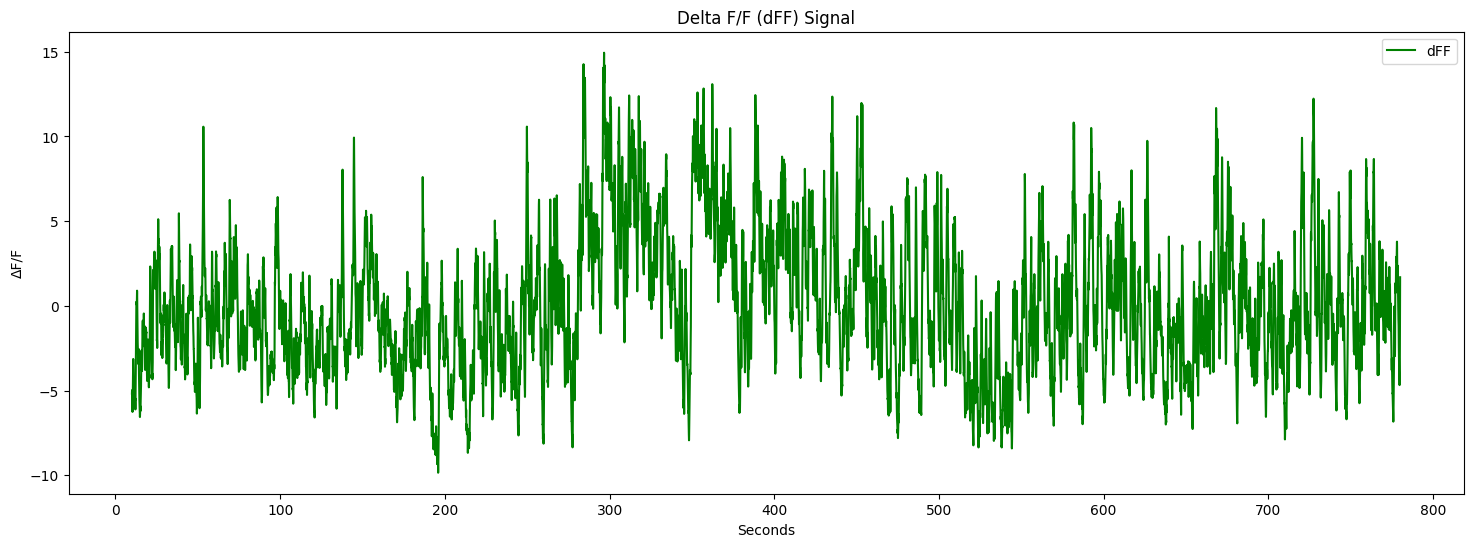

In [5]:
# Downsample the data
# tdt_data_obj.downsample_data(N = 100)
tdt_data_obj.smooth_signal()

# Compute dFF
tdt_data_obj.compute_dff()
tdt_data_obj.plot_dff()

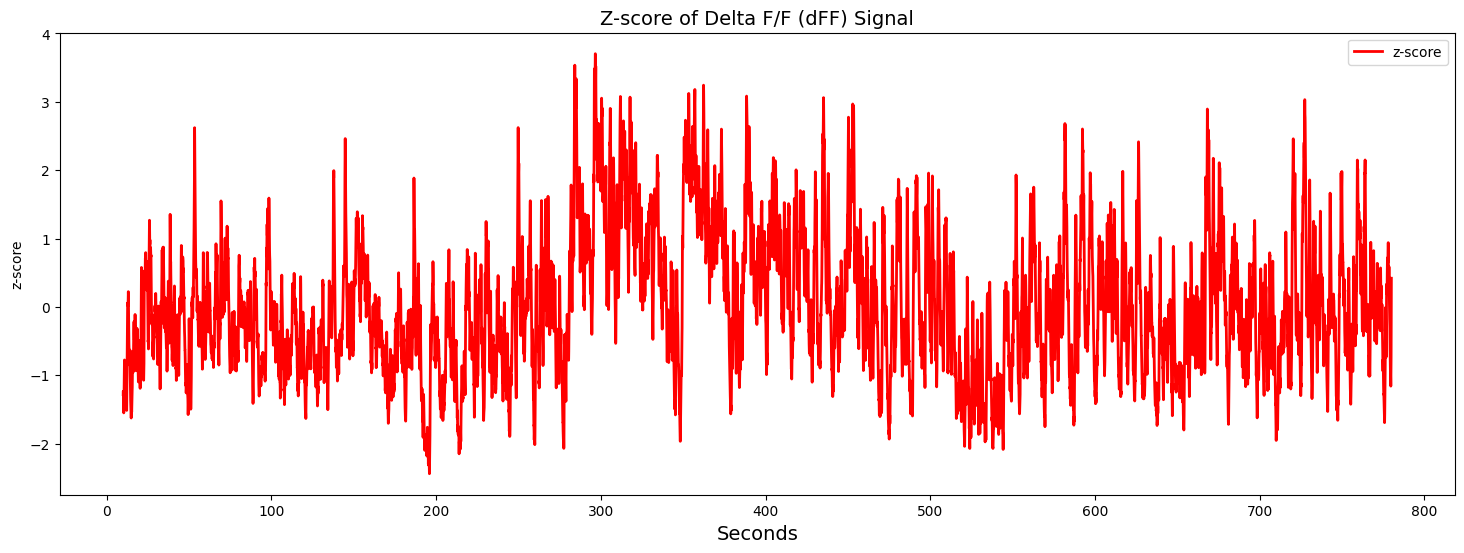

In [6]:
tdt_data_obj.compute_zscore()
tdt_data_obj.plot_zscore()

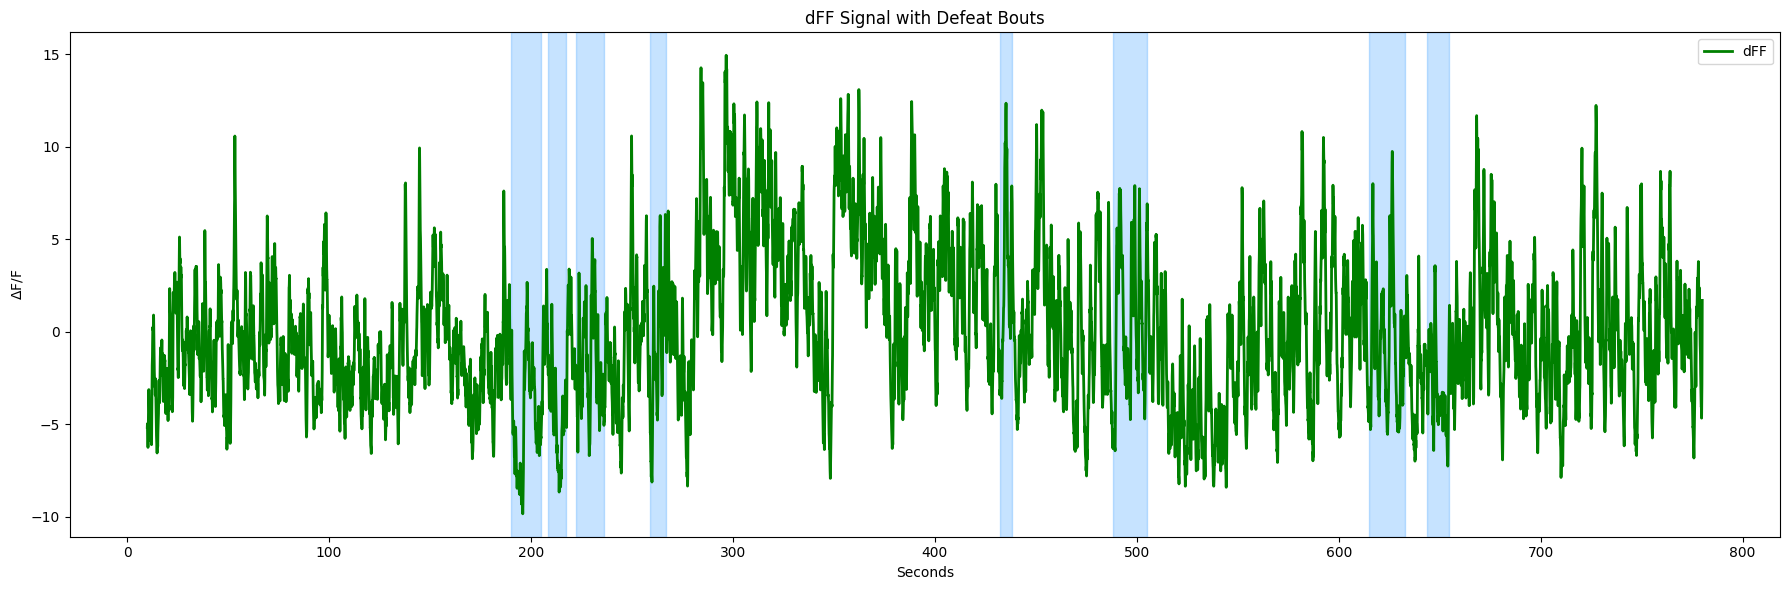

In [9]:
tdt_data_obj.combine_consecutive_behaviors('Defeat', bout_time_threshold=2, min_occurrences=1)
tdt_data_obj.plot_behavior_event('Defeat')